In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.gridspec as gridspec
import textwrap
import os
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import numpy as np
import seaborn as sns

all_data = pd.read_csv('all_data.csv')

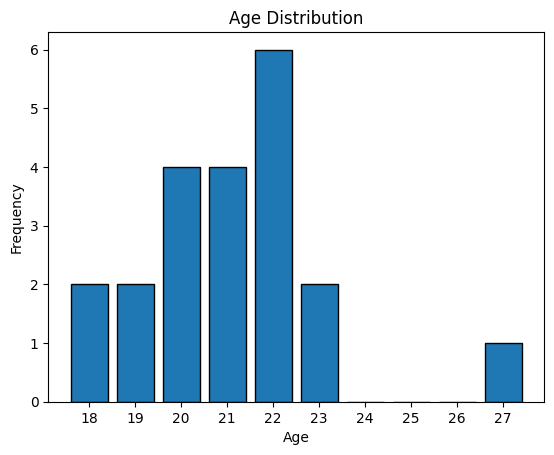

In [115]:

unique_age_df = all_data.drop_duplicates(subset=['Name', 'Age'])

bin_edges = np.arange(min(unique_age_df['Age']) - 0.5, max(unique_age_df['Age']) + 1.5, 1)

plt.hist(unique_age_df['Age'], bins=bin_edges, edgecolor='k', rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Add an offset to the x-axis ticks to position them in the middle of the bars
plt.xticks(np.arange(min(unique_age_df['Age']), max(unique_age_df['Age']) + 1, 1))

plt.show()


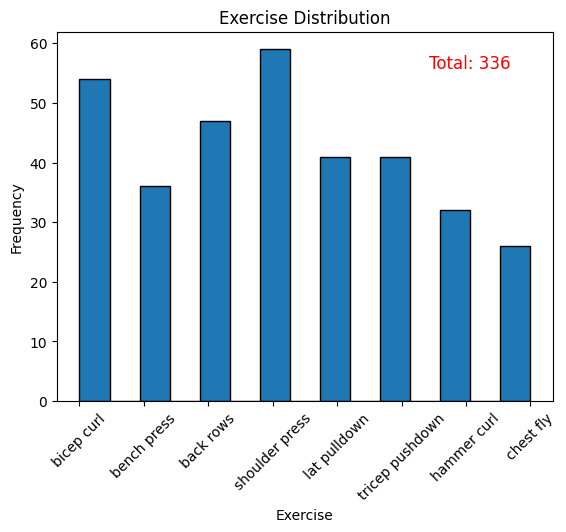

In [116]:
plt.hist(all_data['Exercise Selected'], bins=15, edgecolor='k')
plt.xlabel('Exercise')
plt.xticks(rotation=45) 
plt.ylabel('Frequency')
plt.title('Exercise Distribution')
exercise_data = all_data['Exercise Selected']
plt.text(0.75, 0.9, f'Total: {len(all_data)}', transform=plt.gca().transAxes, fontsize=12, color='r')
plt.show()

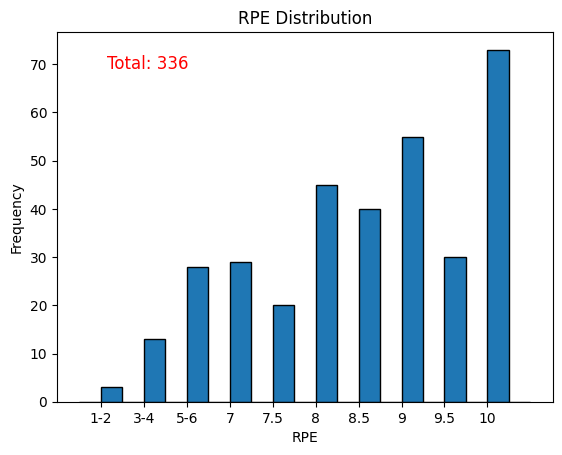

In [117]:
import matplotlib.pyplot as plt
import numpy as np

rpe_mapping = {
    '1-2': 1,
    '3-4': 2,
    '5-6': 3,
    '7': 4,
    '7.5': 5,
    '8': 6,
    '8.5': 7,
    '9': 8,
    '9.5': 9,
    '10': 10.0,
}

# Apply the mapping to create a new numerical RPE column
all_data['Numerical_RPE'] = all_data['RPE'].map(rpe_mapping)

# Calculate bin edges with spacing between the bars
bin_edges = np.arange(0.5, len(rpe_mapping) + 1.5, 0.5)  # Adjust the spacing (here, 1 unit of spacing)

# Plot the histogram using the new numerical column and adjusted bin edges
plt.hist(all_data['Numerical_RPE'], bins=bin_edges, edgecolor='k')
plt.xlabel('RPE')
plt.ylabel('Frequency')
plt.title('RPE Distribution')

# Specify custom x-tick positions and labels
x_tick_positions = list(rpe_mapping.values())
x_tick_labels = list(rpe_mapping.keys())

plt.xticks(x_tick_positions, x_tick_labels)  # Set custom x-tick positions and labels

plt.text(0.1, 0.9, f'Total: {len(all_data)}', transform=plt.gca().transAxes, fontsize=12, color='r')
plt.show()


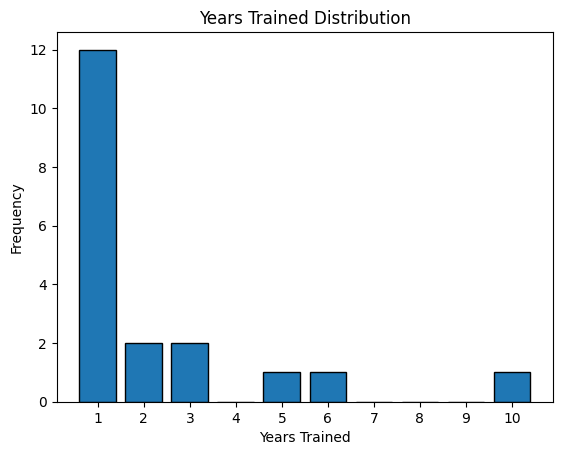

In [118]:
unique_experience_df = all_data.drop_duplicates(subset=['Name', 'Years Trained'])

bin_edges = np.arange(min(unique_experience_df['Years Trained']) - 0.5, max(unique_experience_df['Years Trained']) + 1.5, 1)

plt.hist(unique_experience_df['Years Trained'], bins=bin_edges, edgecolor='k', rwidth=0.8)
plt.xlabel('Years Trained')
plt.ylabel('Frequency')
plt.title('Years Trained Distribution')

# Add an offset to the x-axis ticks to position them in the middle of the bars
plt.xticks(np.arange(min(unique_experience_df['Years Trained']), max(unique_experience_df['Years Trained']) + 1, 1))

plt.show()


In [119]:
dfPage = 2
all_data.loc[dfPage*50:(dfPage+1)*50,['Set', 'Name', 'Exercise Selected', 'Load', 'Reps', 'RPE', 'Remarks', 'Duration', 'Id','Years Trained']]

,Set,Name,Exercise Selected,Load,Reps,RPE,Remarks,Duration,Id,Years Trained
100,3,josh cabrera,shoulder press,90 kg,6,10,sitted,62977,2023-09-05 11:09:16,2.0
101,1,josh cabrera,hammer curl,80 lb,12,10,cable,28336,2023-09-05 11:13:45,2.0
102,2,josh cabrera,hammer curl,80 lb,10,10,cable,33661,2023-09-05 11:15:09,2.0
103,3,josh cabrera,hammer curl,80 lb,12,10,NaN,30575,2023-09-05 11:17:32,2.0
104,1,josh cabrera,bicep curl,14 kg,12,10,NaN,25091,2023-09-05 11:22:42,2.0
105,2,josh cabrera,bicep curl,14 kg,12,10,NaN,21665,2023-09-05 11:24:57,2.0
106,3,josh cabrera,bicep curl,14 kg,12,10,NaN,23247,2023-09-05 11:26:33,2.0
107,1,josh cabrera,chest fly,40 lb,10,10,NaN,43378,2023-09-05 11:29:13,2.0
108,2,josh cabrera,chest fly,40 lb,10,10,NaN,27660,2023-09-05 11:31:10,2.0
109,3,josh cabrera,chest fly,40 lb,10,10,NaN,30432,2023-09-05 11:33:07,2.0


In [120]:
all_data['Exercise Selected'].unique()

array(['bicep curl', 'bench press', 'back rows', 'shoulder press',
       'lat pulldown', 'tricep pushdown', 'hammer curl', 'chest fly'],
      dtype=object)

In [121]:
all_data.loc[all_data['Years Trained'] == 5]

,Set,TimeIndice,HeartRate,VelocityX,VelocityY,VelocityZ,RotationX,RotationY,RotationZ,Id,...,Load,Reps,Name,Sex,Years Trained,Age,RPE,Duration,Remarks,Numerical_RPE
270,1,14:07:20.101;14:07:20.113;14:07:20.124;14:07:2...,116.0;116.0;116.0;116.0;116.0;116.0;116.0;116....,-1.652;-1.652;-1.652;-1.652;-1.652;-1.652;-0.0...,0.67756;0.67756;0.67756;0.67756;0.67756;0.6775...,-0.02634;-0.02634;-0.02634;-0.02634;-0.02634;-...,-0.65363;-0.65363;-0.65363;-0.65363;-0.65363;-...,0.43005;0.43005;0.43005;0.43005;0.43005;0.4300...,0.28222;0.28222;0.28222;0.28222;0.28222;0.2822...,2023-09-09 14:08:53,...,20 kg,10,lou ballesteros,female,5.0,20.0,5-6,39050,NaN,3.0
271,2,14:09:01.522;14:09:01.536;14:09:01.548;14:09:0...,136.0;136.0;136.0;136.0;136.0;136.0;136.0;136....,-0.68714;-0.68714;-0.68714;-0.68714;-0.41659;-...,-0.2897;-0.2897;-0.2897;-0.2897;-0.28012;-0.28...,0.02634;0.02634;0.02634;0.02634;-0.73502;-0.73...,-0.24557;-0.24557;-0.24557;-0.24557;-0.03176;-...,0.00611;0.00611;0.00611;0.00611;0.01588;0.0158...,-0.01344;-0.01344;-0.01344;-0.01344;-0.0452;-0...,2023-09-09 14:09:49,...,20 kg,10,lou ballesteros,female,5.0,20.0,5-6,28501,NaN,3.0
272,3,14:10:07.908;14:10:07.921;14:10:07.933;14:10:0...,141.0;141.0;141.0;141.0;141.0;141.0;141.0;141....,-0.86431;-0.86431;0.34237;0.34237;0.34237;0.34...,-3.12443;-3.12443;-1.29526;-1.29526;-1.29526;-...,-2.07577;-2.07577;-3.11486;-3.11486;-3.11486;-...,0.88698;0.88698;0.1967;0.1967;0.1967;0.1967;0....,1.32436;1.32436;0.05742;0.05742;0.05742;0.0574...,0.27245;0.27245;1.97676;1.97676;1.97676;1.9767...,2023-09-09 14:10:53,...,25 kg,10,lou ballesteros,female,5.0,20.0,5-6,31169,NaN,3.0
277,1,14:13:17.542;14:13:17.555;14:13:17.569;14:13:1...,158.0;158.0;158.0;158.0;158.0;158.0;158.0;158....,0.70629;0.70629;0.70629;0.70629;0.70629;0.7062...,2.66714;2.66714;2.66714;2.66714;2.66714;2.6671...,-0.27533;-0.27533;-0.27533;-0.27533;-0.27533;-...,1.15087;1.15087;1.15087;1.15087;1.15087;1.1508...,-0.44227;-0.44227;-0.44227;-0.44227;-0.44227;-...,1.40499;1.40499;1.40499;1.40499;1.40499;1.4049...,2023-09-09 14:15:17,...,15 kg,6,lou ballesteros,female,5.0,20.0,3-4,41591,NaN,2.0
279,2,14:15:30.632;14:15:30.645;14:15:30.659;14:15:3...,104.0;104.0;104.0;104.0;104.0;104.0;104.0;104....,-0.59137;-0.59137;-0.59137;-0.59137;-0.59137;-...,2.20745;2.20745;2.20745;2.20745;2.20745;2.2074...,-2.04225;-2.04225;-2.04225;-2.04225;-2.04225;-...,0.13073;0.13073;0.13073;0.13073;0.13073;0.1307...,0.34331;0.34331;0.34331;0.34331;0.34331;0.3433...,0.50335;0.50335;0.50335;0.50335;0.50335;0.5033...,2023-09-09 14:16:30,...,15 kg,8,lou ballesteros,female,5.0,20.0,5-6,42943,NaN,3.0
281,3,14:17:24.096;14:17:24.110;14:17:24.123;14:17:2...,119.0;119.0;119.0;119.0;119.0;119.0;119.0;119....,-1.50116;-1.50116;-1.50116;-1.50116;-1.50116;-...,2.46124;2.46124;2.46124;2.46124;2.46124;2.4612...,1.75016;1.75016;1.75016;1.75016;1.75016;1.7501...,0.17226;0.17226;0.17226;0.17226;0.17226;0.1722...,0.86499;0.86499;0.86499;0.86499;0.86499;0.8649...,-0.27733;-0.27733;-0.27733;-0.27733;-0.27733;-...,2023-09-09 14:17:44,...,15 kg,8,lou ballesteros,female,5.0,20.0,7,7394,NaN,4.0
282,1,14:20:55.053;14:20:55.064;14:20:55.075;14:20:5...,157.0;157.0;157.0;157.0;157.0;157.0;157.0;157....,-1.25935;-1.25935;-1.25935;-1.25935;-1.25935;-...,2.55222;2.55222;2.55222;2.55222;2.55222;2.5522...,4.78601;4.78601;4.78601;4.78601;4.78601;4.7860...,-1.79472;-1.79472;-1.79472;-1.79472;-1.79472;-...,-1.35246;-1.35246;-1.35246;-1.35246;-1.35246;-...,-0.0452;-0.0452;-0.0452;-0.0452;-0.0452;-0.045...,2023-09-09 14:22:19,...,40 lb,10,lou ballesteros,female,5.0,20.0,5-6,49488,NaN,3.0
283,2,14:22:25.975;14:22:25.988;14:22:26.000;14:22:2...,116.0;116.0;116.0;116.0;116.0;116.0;116.0;116....,0.10056;-0.15083;-0.15083;-0.15083;-0.15083;-0...,-0.14365;-0.95768;-0.95768;-0.95768;-0.95768;-...,1.06303;-0.79727;-0.79727;-0.79727;-0.79727;-0...,-0.7758;-0.15882;-0.15882;-0.15882;-0.15882;-0...,-0.2529;-0.08919;-0.08919;-0.08919;-0.08919;-0...,0.06842;-0.03665;-0.03665;-0.03665;-0.03665;-0...,2023-09-09 1

In [122]:
print(all_data['Name'].unique())

['kalki lamadrid' 'lhyn mae' 'jom comedia' 'deuz amparo' 'andreb trofeo'
 'raha pullon' 'bryan quidlat' 'josh cabrera' 'jan bush azuela'
 'andrea calayan' 'kenn ballesteros' 'rianne alvarez' 'kim alfaro' 'ronn'
 'sean bartolome' 'doreen' 'duwi' 'lou ballesteros' 'john carlo brinces']


In [123]:
print(len(all_data['Name'].unique()))

19
